In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import utils.dspfunctions as dspf

# Ink and Pixels: Exploring Comics and Manga through Data
### An extensive look at the two most notable countries in the comics industry - **USA** and **Japan**

Comics and Manga - Two **seemingly similar** reads are fighting one of the fiercest battles on the market in recent years. In this notebook, we'll try to answer some of the most common questions. "*Is manga so popular because of anime culture?*", or "*Is manga selling more because of the lower quality of the paper, which comes at the trade-off of a more affordable price?*". Or, perhaps, because of the story? Let's dive into the world of word ballons and ink and **test our hypotheses through data**.

### Table of contents:
* <a href="#popularity">1. "Is it Manga or Graphic Novels. Which one is more popular?"</a>
* <a href="#adaptation">2. "Is it popular because of the TV adaptation?"</a>
* <a href="#publishers">3. "What about the publishers?"</a>

### <span id="popularity">1. Is it Manga or Graphic Novels. Which one is more popular?</span>

In the first section we are going to take a look on the sales in the past few years. We have some datasets, so let's just load them. The first dataset we are going to use is [`this one`](https://www.comichron.com/yearlycomicssales.html), which contains information about the overall sales of comic books in NA and abroad. Note that this dataset is not in csv format, so we should extract the data ourselves. Thankfully, google sheets could make the process easier. :)

When we get to the website, the two columns, which catch our interest are:
* *Estimated OVERALL North American Market size, including estimates for newsstand comics and book channel TPB sales* (*joint calculation by Comichron and ICV2)*
* *OVERALL North American Dollar Sales for Comics, Trade Paperbacks, and Magazines sold by Diamond Comic Distributors to comic book stores (est.)*

Note that this dataset contains information about [Diamond Comics](https://diamondcomics.com) distribution, which is basically, the biggest (and maybe the only) comic book distributor in USA. All comic book shops use it. You could also chech their [comic book locator](https://comicshoplocator.com). <br>
**Why did i chose it?** - because I want us to focus on sales made by licensed stores and first-hand, not garage sales, which are a pretty famous way to sell vintage comics in the US.

In [3]:
diamond_comics_sales = pd.read_csv("datasets/diamond_comics_distributions.csv")

In [4]:
diamond_comics_sales

,year,estimated,overall
0,1997,310000000,NaN
1,1998,290000000,NaN
2,1999,280000000,NaN
3,2000,265000000,NaN
4,2001,272500000,NaN
5,2002,315000000,NaN
6,2003,375000000,310600000.0
7,2004,450000000,328250000.0
8,2005,512500000,352330000.0
9,2006,607500000,395550000.0


The data looks cool and all, but why don't we use the year column as index? It should be way easier to navigate.

In [5]:
diamond_comics_sales = diamond_comics_sales.set_index("year")

In [6]:
diamond_comics_sales

,estimated,overall
year,,
1997,310000000,NaN
1998,290000000,NaN
1999,280000000,NaN
2000,265000000,NaN
2001,272500000,NaN
2002,315000000,NaN
2003,375000000,310600000.0
2004,450000000,328250000.0
2005,512500000,352330000.0


Now, we want to look at a lineplot measuring the estimated and actual sales, but we miss some data from the actual sales. Lets think about it. *Do we need this data for the purposes of this project?* - No! We want to focus on the past 10-20 years. We do not care about the Bronze, Copper or Gold comic book ages. We need to focus mainly on the current years. So the data which we have starts from 2003, which is okay, this near the beggining of the modern comic book age. Lets create a filtered set, which contains only the data between **2003** and **2021**.

In [7]:
diamond_comics_filtered = diamond_comics_sales[diamond_comics_sales.index >= 2003]

In [8]:
diamond_comics_filtered

,estimated,overall
year,,
2003,375000000,310600000.0
2004,450000000,328250000.0
2005,512500000,352330000.0
2006,607500000,395550000.0
2007,680000000,430000000.0
2008,695000000,436600000.0
2009,675000000,428000000.0
2010,675000000,419000000.0
2011,690000000,414000000.0


Good, now let's try to plot the information. To do so, we are going to use the dspf's `plot_estimated_to_actual_sales` method, which is created specifically for this project's purpose.

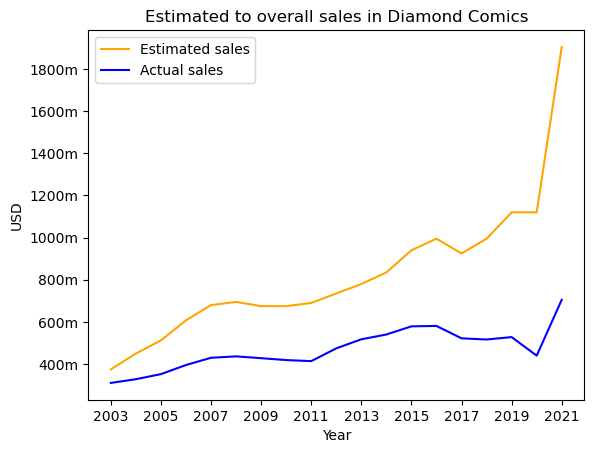

In [9]:
dspf.plot_estimated_to_actual_sales(diamond_comics_filtered, diamond_comics_filtered.estimated, diamond_comics_filtered.overall)

As we can see, the overall income never went over the estimated. *Pause and paunder...* The estimated income is calculated like this. 
* $ c $ - copies count
* $ p $ -  price per single copy
$$ estimated = c * p $$

So it is logical that not all printed copies will be sold. After all, more are always printed than are needed, and even if all the copies are sold, another printing is made.

Each problem has many solutions, so we will proceed to the next one. Unfortunately **our first approach is not valid due to lack of data**, but I was fortunately able to find data for the best selling series. For manga, we will use [this](https://www.installbaseforum.com/forums/threads/oricon-japan-manga-sales-2022-white-paper-2021-nov-22-2022-nov-20-top-50-series-top-200-volumes.1569/) data that contains information on the 200 best-selling manga volumes. As we can see, it's plain text, but I already extracted the first 50 rows, so we could use the data to compare later. And for comics we will be using [this](https://comichron.com/monthlycomicssales/2022/2022-03.html), which also contains the most sold comic books in the month of March 2023. If questions like "why are we looking at all of 2022 for the manga and only looking at one month for the comics" arise - Americans are to blame. They only keep new comics in their stores for a month. But could this be the cause for the low comic book sales...?

In [10]:
top_selling_manga_2022 = pd.read_csv("datasets/top_sold_manga_2022.csv")

In [11]:
top_selling_manga_2022

,title_and_volume,sold_copies
0,Jujutsu Kaisen #18,2110599
1,One Piece #101,2007590
2,One Piece #103,1976427
3,One Piece #102,1946333
4,Jujutsu Kaisen #19,1839622
5,Spy x Family #9,1798542
6,One Piece #104,1609752
7,Jujutsu Kaisen #20,1563314
8,Spy x Family #10,1367092
9,Spy x Family #8,1230355


*Pause and paunder...* There are few series, that are not so popular worldwide. "Jujutsu Kaisen", "World Trigger", "Kingdom", all of them are popular between kids and grown-ups worldwide, but take a look at "Do not Say Mystery" or "The Apothecary Diaries". We could check the [MAL page](https://myanimelist.net/manga/111229/Mystery_to_Iu_nakare?q=Do%20not%20Say%20Mystery&cat=manga) and bam! Only 5,968 members. While there are mangas on the list, like for example One Punch Man, where we could see that in the [MAL page](https://myanimelist.net/manga/44347/One_Punch-Man?q=One%20punch%20man&cat=manga) we have 459,311 members, but still it's lower in the list. What could this tell us...? Well, see. Manga is originaly created in Japan and distributed trough magazines. But this magazines, like Shounen Jump for example, are pretty hard to get worldwide, so the Anime and Manga community is pretty fan-driven. And sometimes things like this happen. Perfect exaple is [Gintama](https://myanimelist.net/manga/44/Gintama?q=Gintama&cat=manga). This series has so many fans... but they are worldwide. In fact, the anime was often on the edge of getting dropped, but still, worldwide it's one of the most [well known series](https://myanimelist.net/anime/918/Gintama?q=gintama&cat=anime). It's so loved, that almost all seasons are in the top 20 list in `Most watched anime` in MAL. This is a perfect example of the discrepancy between the japanese fanbase and the worldwide one.

Let's head to the comic books dataset, it's also in non-csv format, so we could simply convert it into one by inserting the data into google sheets and downloading it as a .csv.

In [12]:
top_selling_comics_2022 = pd.read_csv("datasets/top_sold_comics_2022.csv")

In [13]:
top_selling_comics_2022

,units,dollars,title,issue,price,on_sale,publisher,units.1,projected
0,7,5,Strange,1,$4.99,03/02/22,Marvel,44967,124908
1,15,4,Punisher,1,$5.99,03/09/22,Marvel,37713,104758
2,16,8,Amazing Spider-Man,93,$5.99,03/30/22,Marvel,32638,90661
3,17,9,Immortal X-Men,1,$5.99,03/30/22,Marvel,32450,90138
4,19,13,Spider-Gwen Gwenverse,1,$4.99,03/09/22,Marvel,31740,88166
5,20,16,Carnage,1,$4.99,03/16/22,Marvel,30890,85805
6,23,17,Venom Lethal Protector,1,$4.99,03/23/22,Marvel,28192,78311
7,1,1,Something Is Killing The Children,21,$3.99,03/30/22,Boom,78080,78080
8,2,7,Spawn,327,$2.99,03/09/22,Image,77638,77638
9,24,30,Hulk,5,$3.99,03/30/22,Marvel,26134,72594


Pause and paunder... again. Why there is no DC? Well... it turns out, that [DC ended their deal with Diamond](https://comicbook.com/dc/news/dc-ends-diamond-distribution-deal/). Pretty interesting... Well, if we look [here](https://www.comicbookrevolution.com/march-2022-single-issue-comic-book-sales-rankings/) we could see, that Marvel is in the lead, so we could assume, that there is no DC comic book that is more sold than Strange (which was a big deal, btw. I recommend it :D).

Now, let's come to our point. Let's compare the comic book sales with the manga ones. We are going to look at the projected column in the comic book dataset (for more explanation, check the data website) and compare it with the sales column on the manga dataset and plot it after that.

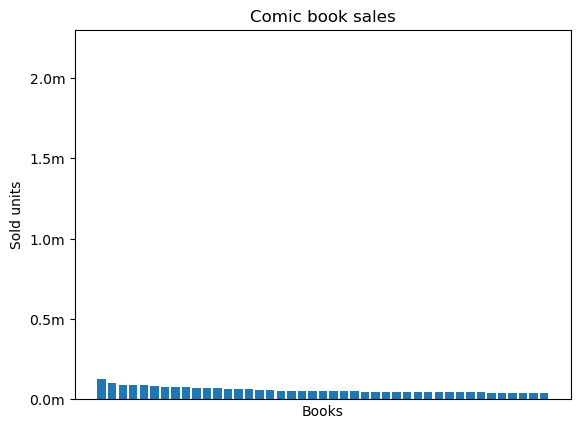

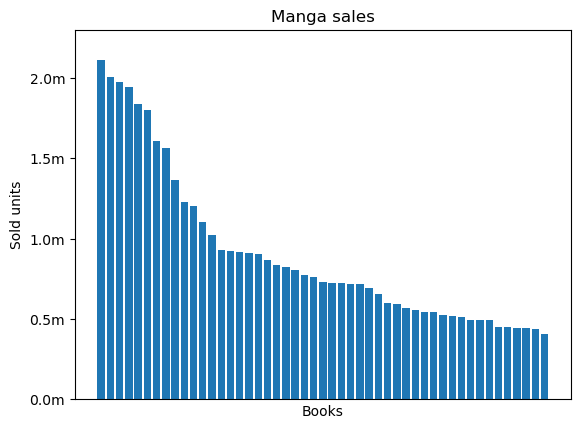

In [14]:
dspf.plot_sales(top_selling_comics_2022.title, top_selling_comics_2022.projected, "Comic book sales")
dspf.plot_sales(top_selling_manga_2022.title_and_volume, top_selling_manga_2022.sold_copies, "Manga sales")

As can be seen, the difference is fractiously large. So big, even, that the above barchart shows no significant changes in copies sold. But let's think about it. What may be causing it...? Well, there are two main hypotheses here. One is that the manga sells more because of its more affordable price, which is at the expense of the lesser quality of the material. The other is that manga is bought for the anime, most often once the reader's interest is piqued by the adaptation. 

### <div id="#adaptation">2. Is it popular because of the TV adaptation?</div>

To proove it we don't really need any datasets. Actually, there is no avaliable info online either. But we may look into some of these articles where people already posted some data and presented the sales after the anime adaptation:
* https://thathashtagshow.com/2020/12/10/demon-slayer-kimetsu-no-yaiba-total-manga-sales-smashes-records-with-over-100-million-sold/
* https://comicbook.com/anime/news/jujutsu-kaisen-manga-sales-rise-600-percent-anime/
* https://comicbook.com/anime/news/chainsaw-man-new-manga-sales-record/

Yes, we could say that manga gets popular because of the anime, but actually, if we take a look at the MAL dataset we will get kind of suprised. Let's load it and test. Because the dataset is way too big, i wan't you to download it and put it into the `/datasets` folder with the name `manga.csv` and `anime.csv`. You can download the dataset from [here](https://www.kaggle.com/datasets/andreuvallhernndez/myanimelist).

In [15]:
manga_data = pd.read_csv("datasets/manga.csv")

In [16]:
anime_data = pd.read_csv("datasets/anime.csv")

In [17]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anime_id          24985 non-null  int64  
 1   title             24985 non-null  object 
 2   type              24927 non-null  object 
 3   score             16050 non-null  float64
 4   scored_by         24985 non-null  int64  
 5   status            24985 non-null  object 
 6   episodes          24438 non-null  float64
 7   start_date        24110 non-null  object 
 8   end_date          22215 non-null  object 
 9   source            21424 non-null  object 
 10  members           24985 non-null  int64  
 11  favorites         24985 non-null  int64  
 12  episode_duration  24387 non-null  object 
 13  total_duration    24162 non-null  object 
 14  rating            24405 non-null  object 
 15  sfw               24985 non-null  bool   
 16  approved          24985 non-null  bool  

In [18]:
anime_data.head(50)

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']
5,32281,Kimi no Na wa.,movie,8.84,1825476,finished_airing,1.0,2016-08-26,2016-08-26,original,...,"['Toho', 'Sound Team Don Juan', 'Amuse', 'JR E...","['Funimation', 'NYAV Post']","Mitsuha Miyamizu, a high school girl, yearns t...",Kimi no Na wa. won the LAFCA Animation Award i...,https://cdn.myanimelist.net/images/anime/5/870...,https://myanimelist.net/anime/32281/Kimi_no_Na_wa,https://www.youtube.com/watch?v=3KR8_igDs1Y,Your Name.,君の名は。,[]
6,2904,Code Geass: Hangyaku no Lelouch R2,tv,8.91,1154270,finished_airing,25.0,2008-04-06,2008-09-28,original,...,"['Bandai Visual', 'Mainichi Broadcasting Syste...","['Funimation', 'Bandai Entertainment']","One year has passed since the Black Rebellion,...",Code Geass: Hangyaku no Lelouch R2 is an origi...,https://cdn.myanimelist.net/images/anime/1088/...,https://myanimelist.net/anime/2904/Code_Geass_...,NaN,Code Geass: Lelouch of the Rebellion R2,コードギアス 反逆のルルーシュ 続編,"['Code Geass: Hangyaku no Lelouch 2nd Season',..."
7,40028,Shingeki no Kyojin: The Final Season,tv,8.80,1237778,finished_airing,16.0,2020-12-07,2021-03-29,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Gabi Braun and Falco Grice have been training ...,Shingeki no Kyojin: The Final Season adapts co...,https://cdn.myanimelist.net/images/anime/1000/...,https://myanimelist.net/anime/40028/Shingeki_n...,https://www.youtube.com/watch?v=SlNpRThS9t8,Attack on Titan: Final Season,進撃の巨人 The Final Season,"['Shingeki no Kyojin Season 4', 'Attack on Tit..."
8,

In [19]:
manga_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manga_id           64833 non-null  int64  
 1   title              64833 non-null  object 
 2   type               64833 non-null  object 
 3   score              24636 non-null  float64
 4   scored_by          64833 non-null  int64  
 5   status             64833 non-null  object 
 6   volumes            48211 non-null  float64
 7   chapters           46042 non-null  float64
 8   start_date         62950 non-null  object 
 9   end_date           51932 non-null  object 
 10  members            64833 non-null  int64  
 11  favorites          64833 non-null  int64  
 12  sfw                64833 non-null  bool   
 13  approved           64833 non-null  bool   
 14  created_at_before  64833 non-null  object 
 15  updated_at         62678 non-null  object 
 16  real_start_date    629

In [20]:
manga_data.head(50)

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."
5,656,Vagabond,manga,9.24,129688,on_hiatus,37.0,327.0,1998-09-03,2015-05-21,...,['Seinen'],"[{'id': 1911, 'first_name': 'Takehiko', 'last_...",['Morning'],"In 16th-century Japan, Shinmen Takezou is a wi...","In 2000, Vagabond won the Japan Media Arts Fes...",https://cdn.myanimelist.net/images/manga/1/259...,https://myanimelist.net/manga/656/Vagabond,Vagabond,バガボンド,[]
6,642,Vinland Saga,manga,9.05,119797,currently_publishing,NaN,NaN,2005-04-13,NaN,...,['Seinen'],"[{'id': 2034, 'first_name': 'Makoto', 'last_na...",['Afternoon'],"Thorfinn, son of one of the Vikings' greatest ...",Vinland Saga won the 13th Japan Media Arts Awa...,https://cdn.myanimelist.net/images/manga/2/188...,https://myanimelist.net/manga/642/Vinland_Saga,Vinland Saga,ヴィンランド・サガ,[]
7,90125,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,manga,8.92,123341,finished,28.0,281.0,2015-05-19,2022-11-02,...,['Seinen'],"[{'id': 2139, 'first_name': 'Aka', 'last_name'...",['Young Jump'],Considered a genius due to having the highest ...,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,https://cdn.myanimelist.net/images/manga/3/188...,https://myanimelist.net/manga/90125/Kaguya-sam...,Kaguya-sama: Love Is War,かぐや様は告らせたい～天才たちの恋愛頭脳戦～,"[""Kaguya Wants to be Confessed To: The Geniuse..."
8,116778,Chainsaw Man,manga,8.75,350057,currently_publishing,NaN,NaN,2018-12-03,NaN,...,['Shounen'],"[{'id': 41158, 'first_name': 'Tatsuki', 'last_...",['Shounen Jump+'],Denji has a simple dream—to live a happy and p...,"As part of the JUMP START initiative, the firs...",https://cdn.myanimelist.net/images/manga/3/216...,https://myanimelist.net/manga/116778/Chainsaw_Man,Chainsaw Man,チェンソーマン,[]
9,1,Monster

Now, let's take a look at some of the manga entries. Specificaly those, who do not have anime adaptation.

In [21]:
filtered_fifty_data = manga_data.head(50)

In [22]:
filtered_fifty_data[~filtered_fifty_data.title.isin(anime_data.title)]

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
5,656,Vagabond,manga,9.24,129688,on_hiatus,37.0,327.0,1998-09-03,2015-05-21,...,['Seinen'],"[{'id': 1911, 'first_name': 'Takehiko', 'last_...",['Morning'],"In 16th-century Japan, Shinmen Takezou is a wi...","In 2000, Vagabond won the Japan Media Arts Fes...",https://cdn.myanimelist.net/images/manga/1/259...,https://myanimelist.net/manga/656/Vagabond,Vagabond,バガボンド,[]
11,44347,One Punch-Man,manga,8.75,224983,currently_publishing,NaN,NaN,2012-06-14,NaN,...,['Seinen'],"[{'id': 1903, 'first_name': 'Yusuke', 'last_na...",['Tonari no Young Jump'],"After rigorously training for three years, the...",One Punch-Man is the manga remake of the origi...,https://cdn.myanimelist.net/images/manga/3/806...,https://myanimelist.net/manga/44347/One_Punch-Man,One-Punch Man,ワンパンマン,"['Onepunchman', 'Onepanman', 'OPM']"
12,3,20th Century Boys,manga,8.95,81920,finished,22.0,249.0,1999-09-27,2006-04-24,...,['Seinen'],"[{'id': 1867, 'first_name': 'Naoki', 'last_nam...",['Big Comic Spirits'],"As the 20th century approaches its end, people...",20th Century Boys won the Kodansha Manga Award...,https://cdn.myanimelist.net/images/manga/5/260...,https://myanimelist.net/manga/3/20th_Century_Boys,20th Century Boys,20世紀少年,"['20 Seiki Shounen', 'Nijuu Seiki Shounen', 'N..."
15,121496,Solo Leveling,manhwa,8.68,252925,finished,NaN,201.0,2018-03-04,2023-05-31,...,[],"[{'id': 49667, 'first_name': '', 'last_name': ...",['KakaoPage'],"Ten years ago, ""the Gate"" appeared and connect...",Solo Leveling is a webtoon series which has be...,https://cdn.myanimelist.net/images/manga/3/222...,https://myanimelist.net/manga/121496/Solo_Leve...,Solo Leveling,나 혼자만 레벨업,"['Na Honjaman Level Up', 'I Level Up Alone']"
19,100448,"Jumyou wo Kaitotte Moratta. Ichinen ni Tsuki, ...",manga,8.79,82303,finished,3.0,18.0,2016-08-10,2017-10-25,...,['Shounen'],"[{'id': 17059, 'first_name': 'Shouichi', 'last...",['Shounen Jump+'],"Helpless and struggling for cash, 20-year-old ...",The series is based on the novel Mikkakan no K...,https://cdn.myanimelist.net/images/manga/5/260...,https://myanimelist.net/manga/100448/Jumyou_wo...,I sold my life for ten thousand yen per year.,寿命を買い取ってもらった。一年につき、一万円で。,"['Mikkakan no Koufuku', 'Three Days of Happine..."
20,336,GTO,manga,8.89,63074,finished,25.0,208.0,1996-12-11,2002-01-30,...,['Shounen'],"[{'id': 2318, 'first_name': 'Tooru', 'last_nam...",['Shounen Magazine (Weekly)'],"22-year-old Eikichi Onizuka: pervert, former g...",GTO was awarded the 22nd Kodansha Manga Award ...,https://cdn.myanimelist.net/images/manga/2/172...,https://myanimelist.net/manga/336/GTO,GTO: Great Teacher Onizuka,GTO,"[""GTO: Tomoko's Big Adventures""]"
24,104,Yotsuba to!,manga,8.88,52318,currently_publishing,NaN,NaN,2003-03-21,NaN,...,[],"[{'id': 1939, 'first_name': 'Kiyohiko', 'last_...",['Dengeki Daioh'],"While most people find the world mundane, five...","In 2006, Yotsuba to! received an Excellenc

As we can see, 13 of the most famous 50 series have yet to be adapted, **immediately proving that manga aren't just read for the anime**. Yes, sales are boosted because of adaptations, but realistically manga culture is something completely different, which again has its connoisseurs.

### <div id="publishers">3. What about the publishers<div/>

Okay, we saw that mangas are not specifically popular because of the anime series, so let's talk about the main driving power - the publishers. In Japan there are multiple manga publishing companies, who run the magazines. Let's try to compare them using the best selling manga dataset.

In [23]:
best_selling_manga = pd.read_csv("datasets/best-selling-manga.csv")

In [24]:
best_selling_manga

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
...,...,...,...,...,...,...,...,...
182,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0,0.90
183,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20.0,0.95
184,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20.0,1.53
185,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0,0.58


In [25]:
best_selling_manga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ KB


In [26]:
best_selling_manga.isnull().sum()

Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64

Well, this dataset looks pretty clean :D 

In [27]:
best_selling_manga["Publisher"].value_counts()

Shueisha                                     65
Kodansha                                     50
Shogakukan                                   32
Akita Shoten                                 11
Hakusensha                                    7
Nihon Bungeisha                               3
Futabasha                                     2
Shōnen Gahōsha                                2
Square Enix                                   2
Kadokawa Shoten                               2
Ushio Shuppansha                              1
Enix (2001–2003), Square Enix (2003–2010)     1
Kobunsha                                      1
Jitsugyo no Nihon Sha                         1
Shueisha/Kodansha                             1
Shinchosha, Tokuma Shoten                     1
Square Enix, Ichijinsha                       1
Gakken                                        1
Enix                                          1
Ushio Shuppan                                 1
Shueisha/Shogakukan/Leed                

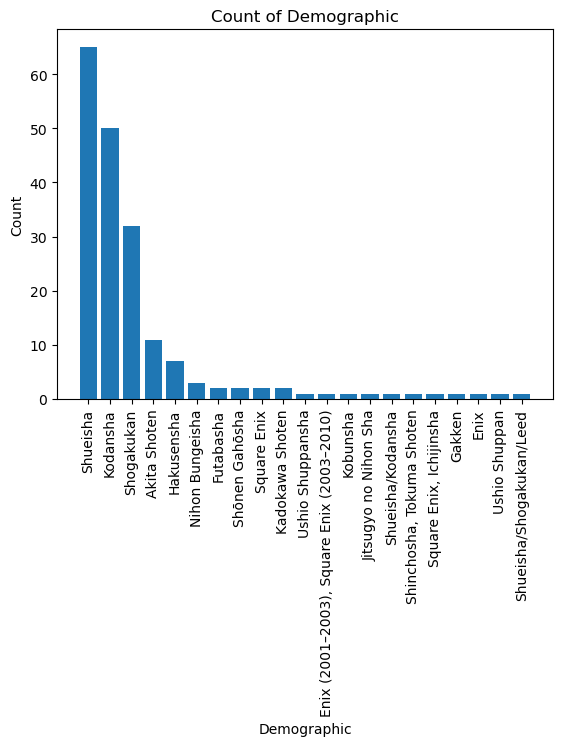

In [28]:
publishers = best_selling_manga["Publisher"].value_counts()

dspf.plot_publishers(publishers)

So, what could we see from this plot - 65 out of the 187 most popular manga series are published in Shueisha. Not so surprising actually, after all shueisha publishes the most read manga magazine series for young and mature - Shounen Jump. Kodansha follows the lead with it's Weekly Shounen Magazine. But WAIT WAIT WAIT!!! **Pause and paunder...**

As we could see, the most popular genre out of the most popular comic format is shounen. But why? Well, because it's for all ages. The story is simple, but yet exciting, the drawings are cool, and most importantly - the anime adaptations are popular. Most of the shounen manga stories are also not so short. They countinue to run for ages and present 20-25 pages story to the reader every week. Let's take a look at this plot. Assume that single volume contains around 7 chapters. 

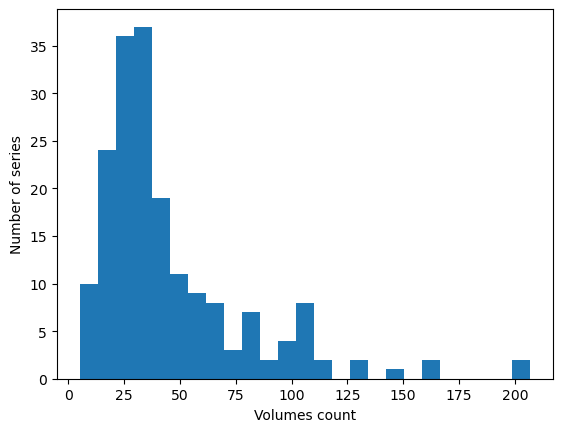

In [29]:
plt.hist(best_selling_manga["No. of collected volumes"], bins = 25)

plt.xlabel("Volumes count")
plt.ylabel("Number of series")

plt.show()

Yes, as we can see, most of the series are published for around 30-40 volumes. Some of them like Bleach and Naruto run for quite more (70-80 volumes) and the most popular piece fiction, which rescently surpassed Harry Potter - One Piece has around 100 volumes at the moment. Which is equal to more than 1000 episodes. Here is something. You can't really say how much episodes could a chapter produce. It depends on the author's style. 

I am really curious about the 200 volumes one, let's check it out.

In [30]:
best_selling_manga[best_selling_manga["No. of collected volumes"] >= 200]

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
7,KochiKame: Tokyo Beat Cops,Osamu Akimoto,Shueisha,Shōnen,201,1976–2016,156.5,0.78


This is kind of interesting, though. Golgo 13 is not Shounen, it's Seinen. Which is similar, actually. Where is the difference - Seinen is more aimed at the adoults, while shounen is for teens. But what do Seinen and Shounen have in common? 
1. Interesting story. All of the shounen and seinen series have cool, touching story containing action, love, superpowers, character development, awesome worldbuilding and so much more. **which is not present in the american comics**. Where is the difference? Well, most of the modern comic books run the same story over and over again with some little tweaks. We all know how Marvel is always connected with the universe, how there is Iron Man and so on, but also it's pretty well known how Iron man died few times already. Here is the first disatvantage, in the western comic book industry a lot of authors work on the same characters, but develop different stories. There is no straight path of development, they just... move, which could really confuse the new reader. On the other hand, manga is created on a weekly basis by a single person (or two, if they split the art and story part), which puts all of the power, character development and worldbuilding in the hands of the mangaka. This way the story depends only on the original creator, which leads to more and better story development. <img src="images/memes/where_to_start.png"/>
<br>
2. Colorful characters - Well, we all know that face. Yes, the superhero one. With the serious expression. Let me tell you something. It's created dozens of years ago, and still - nothing changed since then. The superheros only change their costumes sometimes, and that's all. While the characters in the manga series develop new powers **and don't lose them in the next new series containing the same characters**. The story runs on one path. <img src="images/memes/the_story.png"/>  
3. Most manga series are made to inspire young people to find new talents and develop. Superhero comics also win a point here because they encourage young people to help out and act like superheroes. But Western comics don't just consist of superheroes.

### Conclusion
With the help of a little data, we were able to find the weaknesses and strengths of comics and manga, thus revealing the secret behind which is read more and why. We first compared sales for the most purchased series over a period of time, thus finding that manga sells more. We were then able to track that most manga only gain popularity after anime production, but still most of the popularity comes from manga readers fanbase. We also developed the theme of how there is a drastic difference between the fanbase in Japan and around the world. We tracked the most popular manga publications and discovered which format is the most preferred, which can be used to infer the key points of a good comic book story.